The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(384, 384, 40)
[1. 1. 1. ... 1. 1. 1.]
16
17
18
19
20
21
22
23
24
25
26
27
28
29


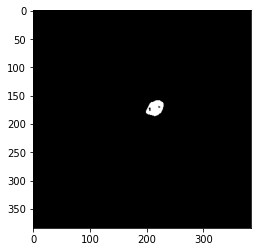

In [19]:
%load_ext autoreload
%autoreload 2

from skimage import data
from matplotlib import pyplot as plt
# import napari
import numpy as np
import PIL
import nibabel as nib
import torch
from utils.helper import read_nii_file
from matplotlib import pyplot
input_dir = r"/dss/dsshome1/lxc09/ra49tad2/data/crossmoda2022_training/ST_labels_Task001/crossmoda2021_ldn_107_Label.nii.gz"

res = nib.load(f'{input_dir}')
np_data = res.get_fdata()

img_dir = r"/dss/dsshome1/lxc09/ra49tad2/data/crossmoda2022_training/ST_labels_Task001/crossmoda2021_ldn_110_Label.nii.gz"
res_img = nib.load(f'{img_dir}')
np_data_img = res_img.get_fdata()

anw = np.array(res)
print(res.shape)
# print(res_img.shape)
torch.set_printoptions(profile="full")

arr = np_data[:,:,18]
arr_img = np_data_img[:,:,18]

print(np_data[np_data > 0])

for i in range(np_data.shape[2]):
    slice = np_data[:,:,i]
    if slice[slice > 0].any():
        print(i)



plt.imshow(arr, cmap='gray')

plt.show()


# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(arr_img, 'gray', interpolation='none')
# plt.subplot(1,2,2)
# plt.imshow(arr_img, 'gray', interpolation='none')
# plt.imshow(arr, 'jet', interpolation='none', alpha=0.7)
# plt.show()




In [7]:
import nibabel as nib

complete_input_folder = sorted(os.listdir('/dss/dsshome1/lxc09/ra49tad2/data/crossmoda2022_training/ST_labels_Task007/'))
cnt = 0
tot = 0
for fname in complete_input_folder:
        tot += 1
        res = nib.load(f'/dss/dsshome1/lxc09/ra49tad2/data/crossmoda2022_training/ST_labels_Task007/{fname}')
        np_data = res.get_fdata()
        if(np_data[np_data > 0].any()):
                cnt += 1
print(f'{cnt}/{tot}')

247/274


In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
from batchgenerators.utilities.file_and_folder_operations import *
from nnunet.dataset_conversion.utils import generate_dataset_json
from nnunet.paths import nnUNet_raw_data, preprocessing_output_dir
from nnunet.utilities.file_conversions import convert_2d_image_to_nifti
import os

task_name = 'Task009_Final'
target_base = join('/dss/dssmcmlfs01/pn69za/pn69za-dss-0002/ra49tad2/nnunet_folder/nnUNet_raw_data', task_name)
target_imagesTr = join(target_base, "imagesTr").replace("\r", "")
target_imagesTs = join(target_base, "imagesTs").replace("\r", "")
target_labelsTs = join(target_base, "labelsTs").replace("\r", "")
target_labelsTr = join(target_base, "labelsTr").replace("\r", "")

# print(os.path.join(nnUNet_raw_data, task_name))
generate_dataset_json(join(target_base, 'dataset.json').replace("\r", ""), target_imagesTr, target_imagesTs, ('hrT2',),
                          labels={0: 'background', 1: 'VS', 2: 'Cochlea'}, dataset_name=task_name, license='None')